In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df =  pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [12]:
df.Outcome.replace(to_replace = { 0 :  'No' , 1 : 'Yes' },inplace = True) #Replacing 0,1 with NO,YES for easy understanding

df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1789,6,125,78,31,0,27.6,0.565,49,Yes


In [13]:
[
     df.loc[df[column] == 0,column].count() for column in ["SkinThickness", "BloodPressure", "Insulin", "Glucose", "BMI"]
]

[573, 90, 956, 13, 28]

In [14]:
# we replace zeros with mean, median depending upon distribution

df["SkinThickness"] = np.where( df["SkinThickness"] == 0, df["SkinThickness"].median(), df["SkinThickness"])

df[ "BloodPressure"] = np.where( df[ "BloodPressure"] == 0, df[ "BloodPressure"].mean(), df[ "BloodPressure"])

df["Insulin"] = np.where( df["Insulin"] == 0, df["Insulin"].median(), df["Insulin"])

df["Glucose"] = np.where( df["Glucose"] == 0, df["Glucose"].mean(), df["Glucose"])

df["BMI"] = np.where( df["BMI"] == 0, df["BMI"].median(), df["BMI"])

In [15]:
# Checking the number of 0 values present

[
    df.loc[df[column] == 0, column].count() for column in ["SkinThickness", "BloodPressure", "Insulin", "Glucose", "BMI"]
]

[0, 0, 0, 0, 0]

In [16]:
df.Outcome.replace(to_replace = { 'No' : 0, 'Yes' : 1},inplace = True) #Replacing NO,YES with 0,1

In [17]:
X = df.drop(["Outcome"],axis = 1) # X contains all independant variables
y = df["Outcome"] # Y contains only the dependant variable

In [18]:
# Class balance between dependant variable is imbalanced
from imblearn import combine

# To make the dependant variable balanced using SMOTETomek method
smt = combine.SMOTETomek(random_state=14)

# resampling the dataset
X, y = smt.fit_resample(X, y)

In [19]:
from sklearn.model_selection import train_test_split

# splitting X and Y as train & test sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pl = [
    LogisticRegression(solver = 'liblinear'), SVC(), KNeighborsClassifier(), 
    DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB()
    ]


In [21]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
model_l = [
    "Logistic Regression", "SVC", "KNeighborsClassifier", 
    "DecisionTreeClassifier", "RandomForestClassifier", "GaussianNB"
    ]

acc_list = []
auc_list = []
cm_list = []
F1_list = []
for model in model_pl:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc_list.append(round(metrics.accuracy_score(y_test,y_pred),2))
  F1_list.append(round(metrics.f1_score(y_test,y_pred),2))
  fpr,tpr, threshold = metrics.roc_curve(y_test,y_pred)
  auc_list.append(round(metrics.auc(fpr,tpr),2))
  cm_list.append(confusion_matrix(y_test, y_pred))

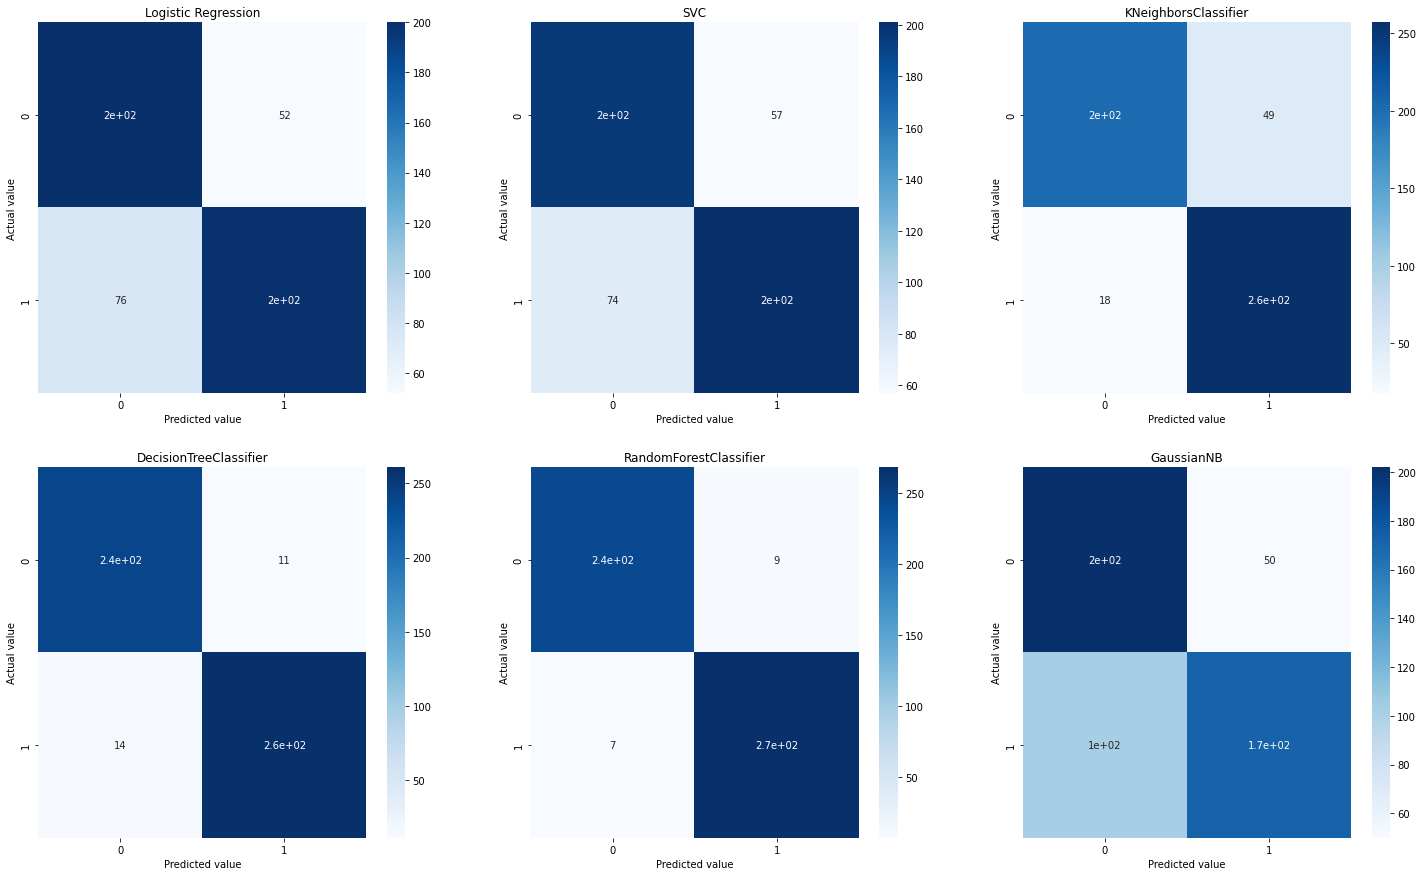

In [23]:
fig = plt.figure(figsize=(25,15))
for i in range(len(cm_list)):
  cm = cm_list[i]
  model  = model_l[i]
  sub = fig.add_subplot(2,3,i+1).set_title(model)
  cm_plt = sns.heatmap(cm, annot = True, cmap = 'Blues')
  cm_plt.set_xlabel("Predicted value")
  cm_plt.set_ylabel("Actual value")

In [25]:
res_df = pd.DataFrame({"Model" : model_l, "Accuracy" : acc_list, "AUC" : auc_list, "F1" : F1_list})
res_df

,Model,Accuracy,AUC,F1
0,Logistic Regression,0.76,0.76,0.76
1,SVC,0.75,0.75,0.75
2,KNeighborsClassifier,0.87,0.87,0.88
3,DecisionTreeClassifier,0.95,0.95,0.95
4,RandomForestClassifier,0.97,0.97,0.97
5,GaussianNB,0.71,0.71,0.69
